Exploratory Data Analysis of the Premier League (2022-23 Season) – Zach Skiba
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

The English Premier League (EPL) is one of the most competitive football leagues in the world, with teams looking for success through tactical play, player performance, and strategic decision making. This analysis aims to explore key performance metrics such as home advantage, goal-scoring efficiency, and shot conversion rates to uncover insights into what factors contribute to winning. By using data analysis techniques, we will examine whether home teams have a statistical "advantage", how efficiently teams convert shots into goals, and the overall correlation between match statistics and success in the league.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('epl_results_2022-23.csv')

df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0


In [ ]:
#rename columns
df.rename(columns={
    'Date': 'Match Date',
    'Time': 'Kickoff Time',
    'HomeTeam': 'Home Team',
    'AwayTeam': 'Away Team',
    'FTHG': 'Full Time Home Goals',
    'FTAG': 'Full Time Away Goals',
    'FTR': 'Full Time Result',
    'HTHG': 'Half Time Home Goals',
    'HTAG': 'Half Time Away Goals',
    'HTR': 'Half Time Result',
    'Referee': 'Referee',
    'HS': 'Home Shots',
    'AS': 'Away Shots',
    'HST': 'Home Shots on Target',
    'AST': 'Away Shots on Target',
    'HF': 'Home Fouls',
    'AF': 'Away Fouls',
    'HC': 'Home Corners',
    'AC': 'Away Corners',
    'HY': 'Home Yellow Cards',
    'AY': 'Away Yellow Cards',
    'HR': 'Home Red Cards',
    'AR': 'Away Red Cards'
}, inplace=True)

df.head()

,Match Date,Kickoff Time,Home Team,Away Team,Full Time Home Goals,Full Time Away Goals,Full Time Result,Half Time Home Goals,Half Time Away Goals,Half Time Result,...,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0


In [4]:
#check for null values
df.isna().sum()

Match Date              0
Kickoff Time            0
Home Team               0
Away Team               0
Full Time Home Goals    0
Full Time Away Goals    0
Full Time Result        0
Half Time Home Goals    0
Half Time Away Goals    0
Half Time Result        0
Referee                 0
Home Shots              0
Away Shots              0
Home Shots on Target    0
Away Shots on Target    0
Home Fouls              0
Away Fouls              0
Home Corners            0
Away Corners            0
Home Yellow Cards       0
Away Yellow Cards       0
Home Red Cards          0
Away Red Cards          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Match Date            380 non-null    object
 1   Kickoff Time          380 non-null    object
 2   Home Team             380 non-null    object
 3   Away Team             380 non-null    object
 4   Full Time Home Goals  380 non-null    int64 
 5   Full Time Away Goals  380 non-null    int64 
 6   Full Time Result      380 non-null    object
 7   Half Time Home Goals  380 non-null    int64 
 8   Half Time Away Goals  380 non-null    int64 
 9   Half Time Result      380 non-null    object
 10  Referee               380 non-null    object
 11  Home Shots            380 non-null    int64 
 12  Away Shots            380 non-null    int64 
 13  Home Shots on Target  380 non-null    int64 
 14  Away Shots on Target  380 non-null    int64 
 15  Home Fouls            380 non-null    in

In [ ]:
#Change type
df['Match Date'] = pd.to_datetime(df['Match Date'], dayfirst=True)
df.head()


,Match Date,Kickoff Time,Home Team,Away Team,Full Time Home Goals,Full Time Away Goals,Full Time Result,Half Time Home Goals,Half Time Away Goals,Half Time Result,...,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
0,2022-08-05,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,2022-08-06,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,2022-08-06,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,2022-08-06,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,2022-08-06,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0


In [7]:
df.describe()

,Match Date,Full Time Home Goals,Full Time Away Goals,Half Time Home Goals,Half Time Away Goals,Home Shots,Away Shots,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
count,380,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2023-01-08 15:05:41.052631296,1.634211,1.218421,0.757895,0.563158,13.952632,11.310526,4.907895,3.894737,10.597368,10.931579,5.636842,4.471053,1.671053,1.915789,0.047368,0.026316
min,2022-08-05 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-10-16 00:00:00,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2023-01-21 00:00:00,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2023-04-05 00:00:00,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,7.000000,5.000000,13.000000,13.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,2023-05-28 00:00:00,9.000000,6.000000,5.000000,3.000000,33.000000,30.000000,15.000000,11.000000,23.000000,24.000000,17.000000,19.000000,6.000000,7.000000,2.000000,1.000000
std,NaN,1.419944,1.183518,0.918480,0.746998,5.604170,4.941173,2.495260,2.230627,3.288020,3.463424,3.073370,2.817530,1.249677,1.358357,0.224768,0.160284


In [8]:
df.columns

Index(['Match Date', 'Kickoff Time', 'Home Team', 'Away Team',
       'Full Time Home Goals', 'Full Time Away Goals', 'Full Time Result',
       'Half Time Home Goals', 'Half Time Away Goals', 'Half Time Result',
       'Referee', 'Home Shots', 'Away Shots', 'Home Shots on Target',
       'Away Shots on Target', 'Home Fouls', 'Away Fouls', 'Home Corners',
       'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards',
       'Home Red Cards', 'Away Red Cards'],
      dtype='object')

In [9]:
#Check duplicates
df[df.duplicated(keep=False)]

,Match Date,Kickoff Time,Home Team,Away Team,Full Time Home Goals,Full Time Away Goals,Full Time Result,Half Time Home Goals,Half Time Away Goals,Half Time Result,...,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards


Exploratory Data Analysis
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. How does home advantage impact match outcomes?


In [10]:
# Calculate Win Percentages
home_wins = (df['Full Time Result'] == 'H').sum()
away_wins = (df['Full Time Result'] == 'A').sum()
draw = (df['Full Time Result'] == 'D').sum()

total_matches = len(df)

home_win_percentage = (home_wins / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100
draw_percentage = (draw / total_matches) * 100


print(f"Home Win Percentage: {home_win_percentage:.2f}%")
print(f"Away Win Percentage: {away_win_percentage:.2f}%")
print(f"Draw Percentage: {draw_percentage:.2f}%")

Home Win Percentage: 48.42%
Away Win Percentage: 28.68%
Draw Percentage: 22.89%


The home team wins 48.42% of the time

In [11]:
# Calculate Goal Percentages of Total Goals
home_goals = df['Full Time Home Goals'].sum()
away_goals = df['Full Time Away Goals'].sum()

total_goals = home_goals + away_goals

home_percent = (home_goals / total_goals) * 100
away_percent = (away_goals / total_goals) * 100

print(f"Home Goals Percentage: {home_percent:.2f}%")
print(f"Away Goals Percentage: {away_percent:.2f}%")

Home Goals Percentage: 57.29%
Away Goals Percentage: 42.71%


The home team scores 57.29% of the total goals.

In [12]:
#Calculate Shot Conversion Rate
df['Home_Shot_Percent'] = (df['Full Time Home Goals'] / df['Home Shots']) * 100
df['Away_Shot_Percent'] = (df['Full Time Away Goals'] / df['Away Shots']) * 100

home_shot_avg = df['Home_Shot_Percent'].mean()
away_shot_avg = df['Away_Shot_Percent'].mean()

print(f"Home Shot Conversion Rate: {home_shot_avg:.2f}%")
print(f"Away Shot Conversion Rate: {away_shot_avg:.2f}%")

Home Shot Conversion Rate: 12.18%
Away Shot Conversion Rate: 11.74%


The home team scores 12.18% of their total shots while the away team 11.74% of their total shots.

<function matplotlib.pyplot.show(close=None, block=None)>

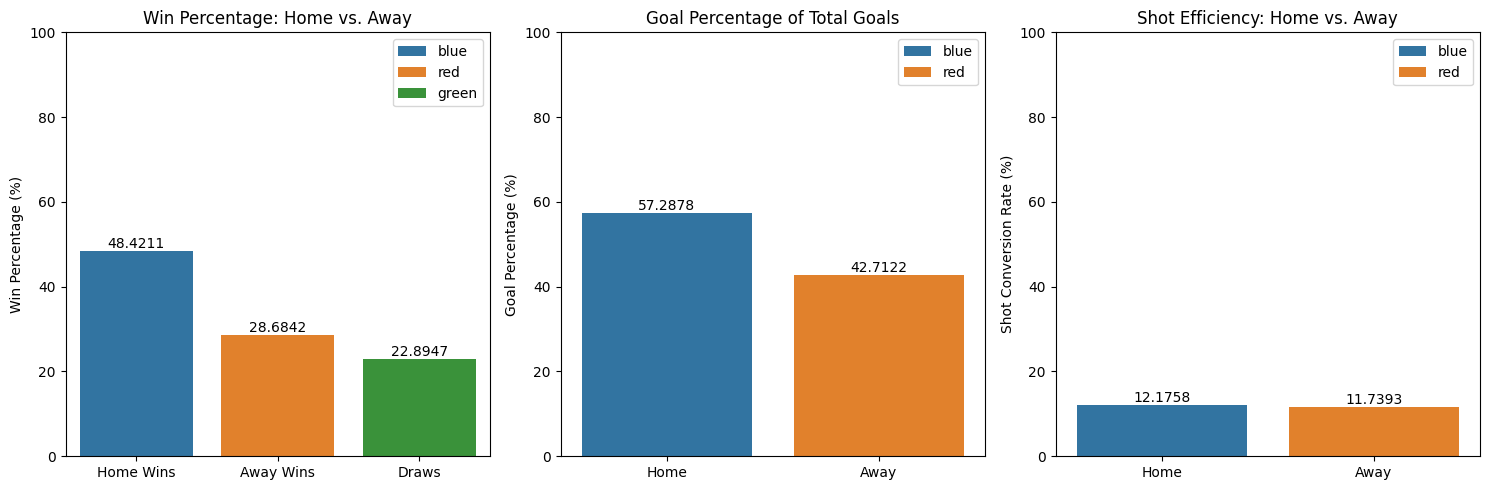

In [13]:
#Charts

fig, axes = plt.subplots(1,3, figsize=(15,5))

# Win Percentages
ax = sns.barplot(x=['Home Wins', 'Away Wins', 'Draws'], y= [home_win_percentage, away_win_percentage, draw_percentage], hue= ['blue', 'red', 'green'], ax = axes[0])
axes[0].set_ylabel("Win Percentage (%)")
axes[0].set_title("Win Percentage: Home vs. Away")
axes[0].set_ylim(0, 100)

for bars in ax.containers:
    ax.bar_label(bars)

# Goal Percentages
ax = sns.barplot(x=['Home', 'Away'], y= [home_percent, away_percent],hue= ['blue', 'red'], ax = axes[1])
axes[1].set_ylabel("Goal Percentage (%)")
axes[1].set_title("Goal Percentage of Total Goals")
axes[1].set_ylim(0, 100)

for bars in ax.containers:
    ax.bar_label(bars)


#Shot Conversion Rate
ax = sns.barplot(x=['Home', 'Away'], y=[home_shot_avg, away_shot_avg], hue=['blue', 'red'], ax= axes[2])
axes[2].set_ylabel("Shot Conversion Rate (%)")
axes[2].set_title("Shot Efficiency: Home vs. Away")
axes[2].set_ylim(0, 100)

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show

Graph 1. Home teams win 48.42% of matches, compared to 28.68% for away teams, with 22.89% ending in a draw.

Graph 2. Home teams score 57.29% of all the goals, while away teams score only 42.71% of the goals. 

Graph 3. The home team scores about 12.18% of its total shots, while the away team scores 11.74% of its total shots

What Factors are most correlated with winning a match?
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
#Assign match reult with numbers
df['Match Result'] = df['Full Time Result'].astype('category').cat.codes

df[['Full Time Result', 'Match Result']].head()

,Full Time Result,Match Result
0,A,0
1,D,1
2,H,2
3,H,2
4,H,2


In [15]:
corr = df.corr(numeric_only= True)

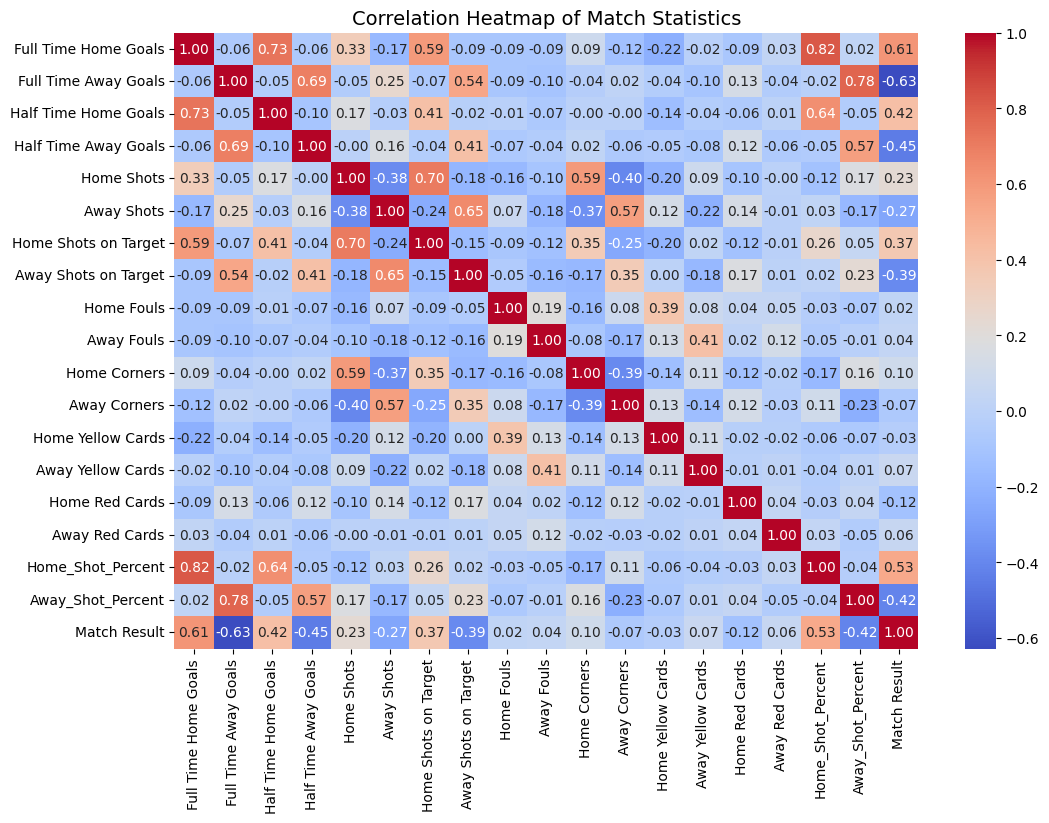

In [ ]:
#Make heatmap
plt.figure(figsize= (12,8))

sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= ".2f")

plt.title("Correlation Heatmap of Match Statistics", fontsize=14)

plt.show()

In [17]:
#unstack correlation
corr_pairs = corr.unstack()


In [18]:
#Only get values with highish correlation
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.4) & (sorted_pairs < 1) | (sorted_pairs < -0.4) & (sorted_pairs > -1)]
high_corr

Full Time Away Goals  Match Result           -0.628106
Match Result          Full Time Away Goals   -0.628106
                      Half Time Away Goals   -0.446231
Half Time Away Goals  Match Result           -0.446231
Away_Shot_Percent     Match Result           -0.417772
Match Result          Away_Shot_Percent      -0.417772
Home Shots            Away Corners           -0.404807
Away Corners          Home Shots             -0.404807
Half Time Away Goals  Away Shots on Target    0.409373
Away Shots on Target  Half Time Away Goals    0.409373
Home Shots on Target  Half Time Home Goals    0.411608
Half Time Home Goals  Home Shots on Target    0.411608
Away Yellow Cards     Away Fouls              0.412674
Away Fouls            Away Yellow Cards       0.412674
Half Time Home Goals  Match Result            0.416302
Match Result          Half Time Home Goals    0.416302
                      Home_Shot_Percent       0.529272
Home_Shot_Percent     Match Result            0.529272
Away Shots

In [19]:
#We only want to see what is correlated with the final match result
sorted_pairs = corr_pairs['Match Result'].drop('Match Result')
high_corr = sorted_pairs[(sorted_pairs > 0.4) & (sorted_pairs < 1) | (sorted_pairs < -0.4) & (sorted_pairs > -1)]
high_corr

Full Time Home Goals    0.610393
Full Time Away Goals   -0.628106
Half Time Home Goals    0.416302
Half Time Away Goals   -0.446231
Home_Shot_Percent       0.529272
Away_Shot_Percent      -0.417772
dtype: float64

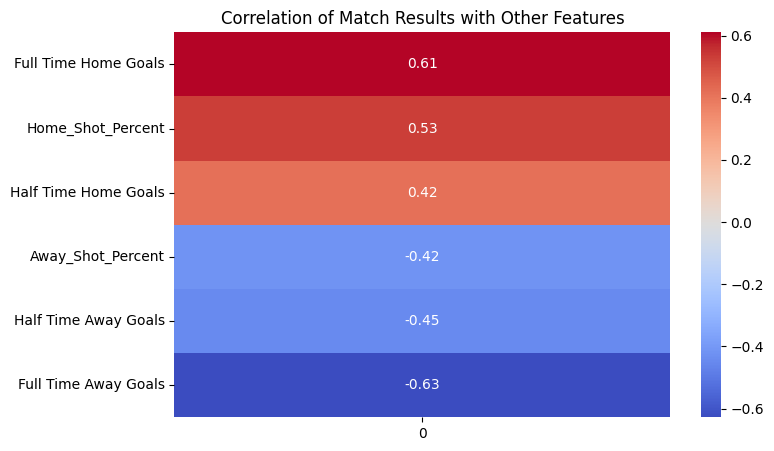

In [20]:
#Plot the values with high correlation
plt.figure(figsize=(8, 5))

sorted_corr = high_corr.sort_values(ascending=False).to_frame()

sns.heatmap(sorted_corr, annot=True, cmap= 'coolwarm')

plt.title('Correlation of Match Results with Other Features')
plt.show()

There is a moderate correlation between a team's goals, shot conversion rate, and the match result. This suggests that teams with a that scores more goals and have a higher shot conversion rate—meaning are more efficient at turning shots into goals—are more likely to win. While other factors also influence match outcomes, the data indicates that the more efficiently a team converts its chances, the greater its chances of winning.

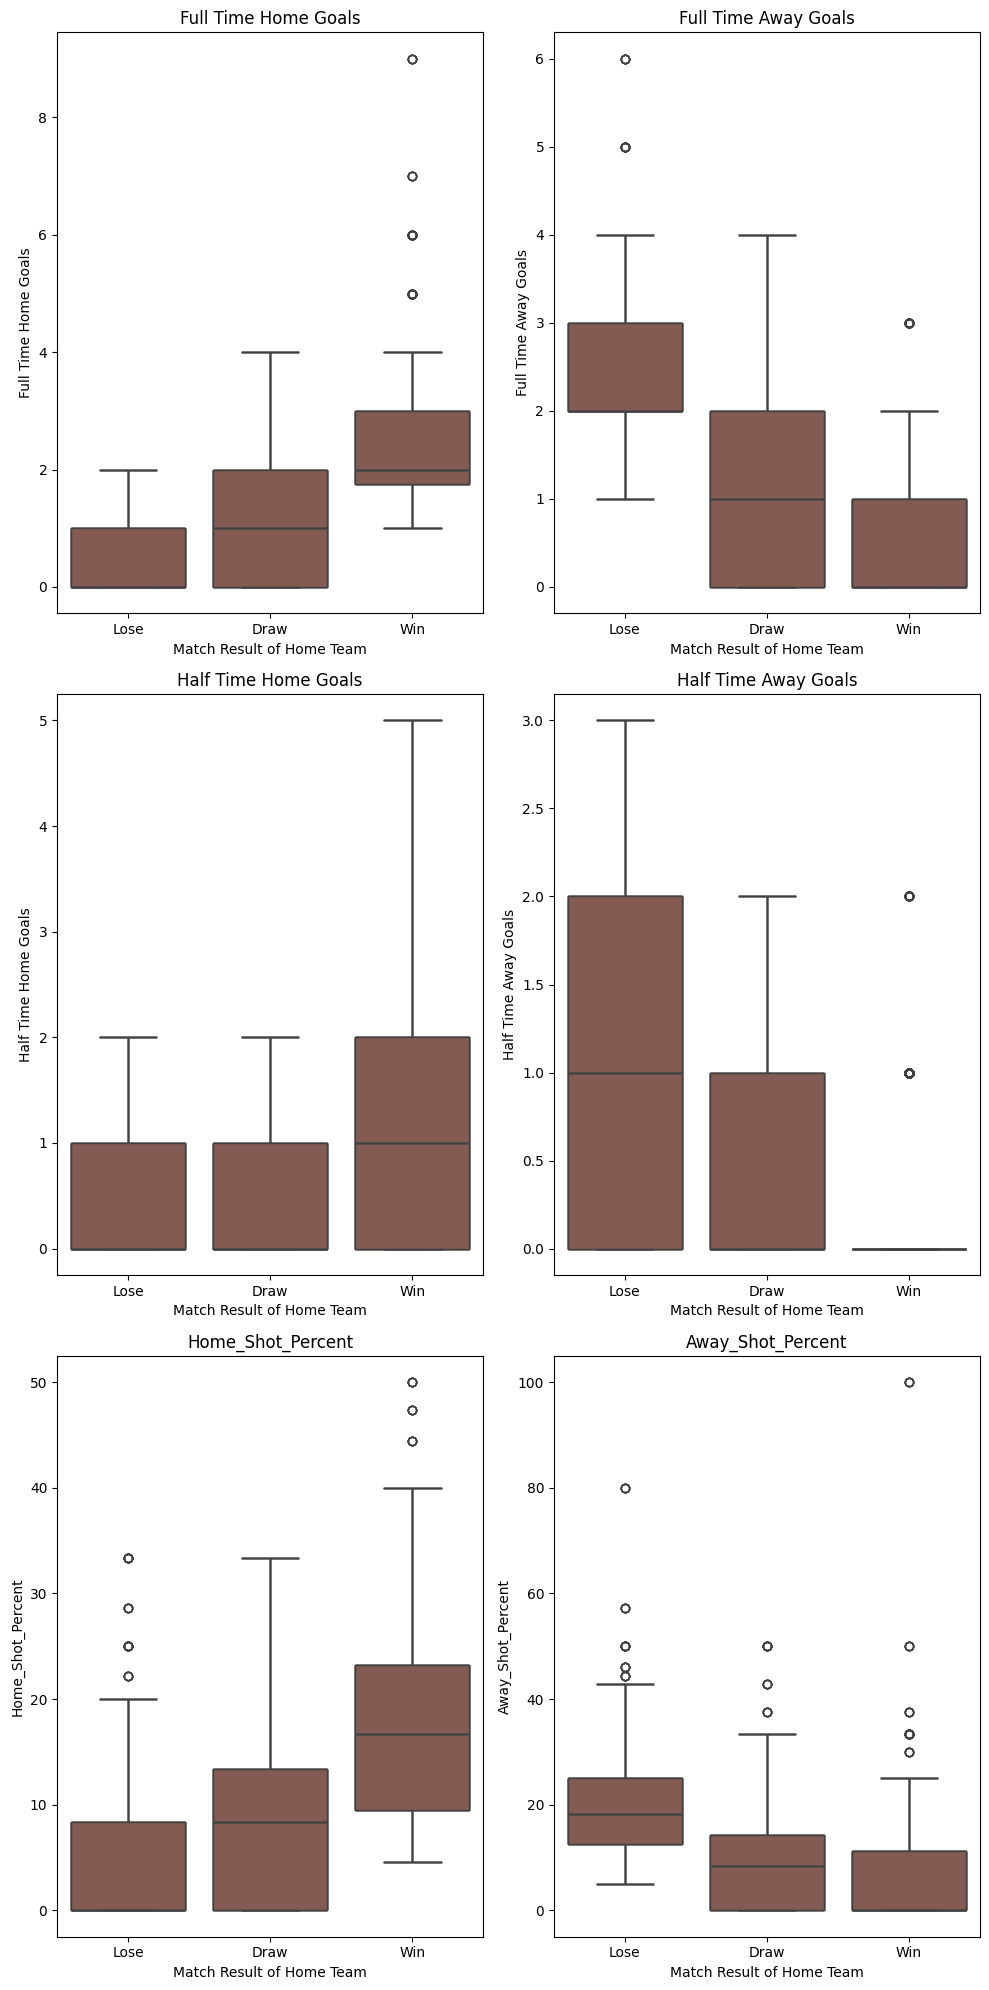

In [21]:
#Label the match results and add it as a new column
match_result_mapping = {0: 'Lose', 1: 'Draw', 2: 'Win'}
df['Match Result'] = df['Match Result'].map(match_result_mapping)


fig, axes = plt.subplots(3, 2, figsize=(10, 20))


features = ['Full Time Home Goals', 'Half Time Home Goals' ,'Home_Shot_Percent','Full Time Away Goals', 'Half Time Away Goals','Away_Shot_Percent']

#Create the box plots
for i, feature in enumerate(features):
   for i, feature in enumerate(features):
    row = i % 3  
    col = i // 3   
    ax = axes[row, col]
    
   
    sns.boxplot(x='Match Result', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('Match Result of Home Team')

# Display the plots

plt.tight_layout()
plt.show()


Full-Time Goals (Home & Away) vs. Match Result:

-The first graph clearly shows that when the home team scores more goals, they are far more likely to win. The median number of goals in wins is significantly higher than in draws or losses.

-Conversely, when the away team scores more goals, the home team tends to lose more often. This is expected, as goal-scoring is important part of match outcomes.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

Halftime Goals vs. Match Result:

-A similar trend is visible in halftime goals: teams that lead at halftime tend to win the match more often.

-The distribution suggests that teams with 1 or more halftime goals have a much higher chance of winning, reinforcing the idea that early leads contribute to final results.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

Shot Conversion Rate (Home & Away) vs. Match Result:

-The home team’s shot conversion rate (percentage of shots that result in goals) is noticeably higher in wins compared to losses or draws.

-When the away team has a high shot conversion rate, the home team is more likely to lose. This shows the correlation between shot conversion rate and the match result.

Correlation Between Rank and Other Features




In [22]:
#Make new Data Frame
data ={'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Club': ['Man City', 'Arsenal', 'Man United', 'Newcastle', 'Liverpool', 'Brighton', 'Aston Villa', 
             'Tottenham', 'Brentford', 'Fulham', 'Crystal Palace', 'Chelsea', 'Wolves', 'West Ham', 'Bournemouth', 
             'Nottingham', 'Everton', 'Leicester', 'Leeds', 'Southampton']}

new_df = pd.DataFrame(data)

In [23]:
#Get the total goals
team_goals = []
teams = pd.concat([df['Home Team'], df['Away Team']]).unique()
for team in new_df['Club']:

    home_goals = df[df['Home Team'] == team]['Full Time Home Goals'].sum()
    
    away_goals = df[df['Away Team'] == team]['Full Time Away Goals'].sum()
    
    total_goals = home_goals + away_goals
    
    team_goals.append(total_goals)

new_df['Goals'] = team_goals


In [24]:
#get the total shots

team_shots = []
teams = pd.concat([df['Home Team'], df['Away Team']]).unique()
for team in new_df['Club']:

    home_shots = df[df['Home Team'] == team]['Home Shots'].sum()
    
    away_shots = df[df['Away Team'] == team]['Away Shots'].sum()
    
    total_shots = home_shots + away_shots
    
    team_shots.append(total_shots)

new_df['Shots'] = team_shots

In [25]:
new_df.head()


,Rank,Club,Goals,Shots
0,1,Man City,94,603
1,2,Arsenal,88,593
2,3,Man United,58,592
3,4,Newcastle,68,571
4,5,Liverpool,75,605


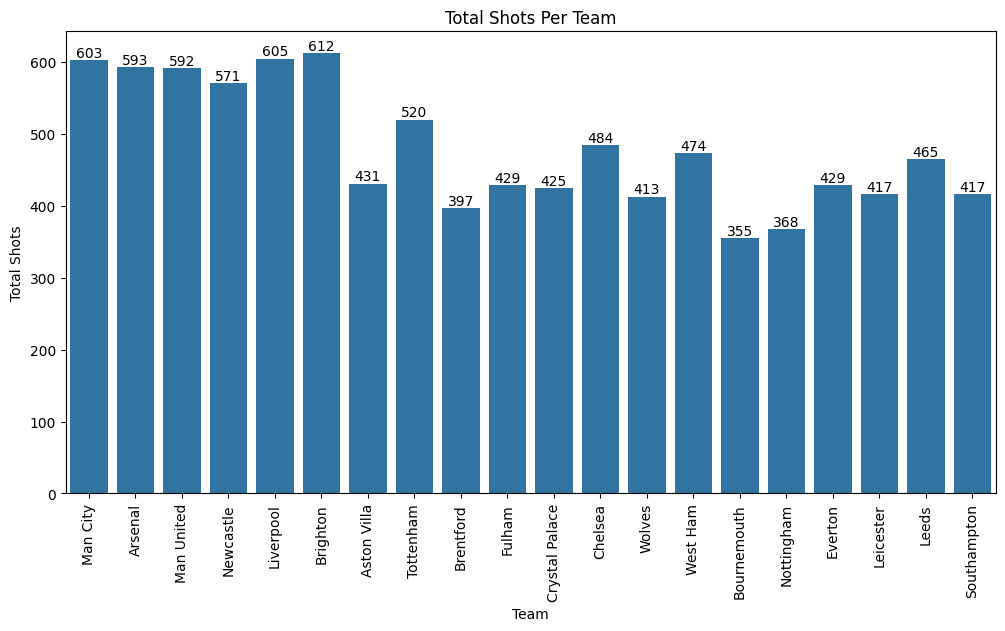

In [26]:
#Total shots per team
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Club', y='Shots', data=new_df)
plt.xticks(rotation=90) 
plt.title('Total Shots Per Team')
plt.xlabel('Team')
plt.ylabel('Total Shots')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()



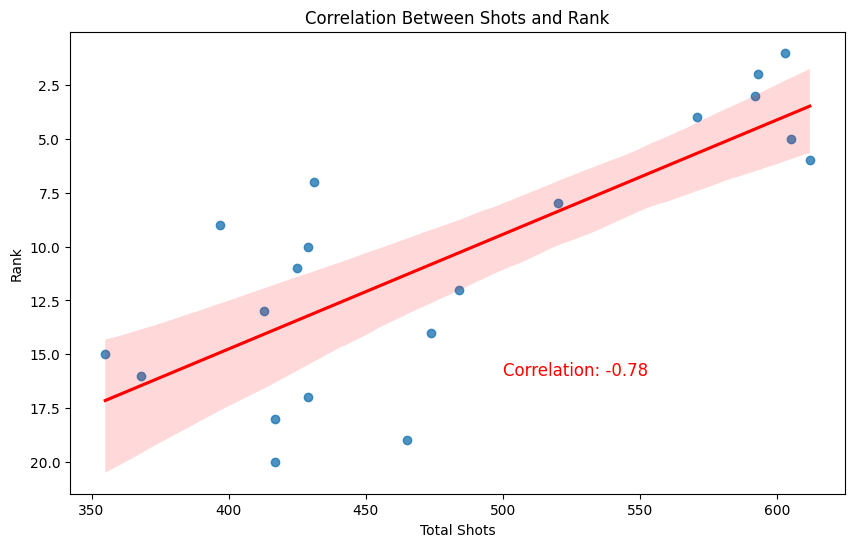

In [27]:
#Regression plot with total shots and rank
plt.figure(figsize=(10, 6))

sns.regplot(x='Shots', y='Rank', data=new_df, line_kws= {'color': 'red'})

plt.gca().invert_yaxis() 
plt.xlabel('Total Shots')
plt.ylabel('Rank')
plt.title('Correlation Between Shots and Rank')

correlation = np.corrcoef(new_df['Shots'], new_df['Rank'])[0, 1]

plt.text(x=500, y=16, s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

plt.show()


Analysis of Total Shots and Team Rank:

-The regression plot shows a strong negative correlation (-0.78) between the total number of shots taken and a team's final rank in the league.

-The downward trend suggests that the higher ranked teams(closer to rank 1), generally take more shots.

-This does not imply causation, but it suggests that teams that shoot more are more likely to finish at the top of the table.

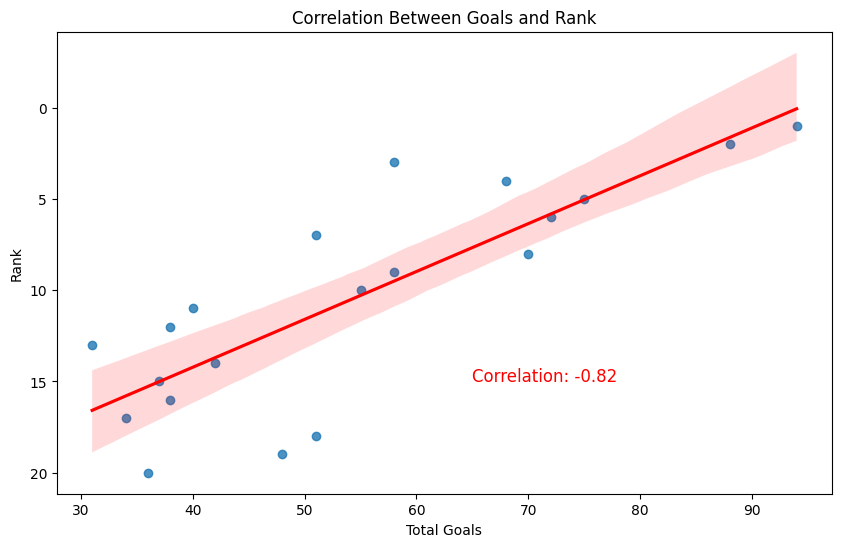

In [28]:
#Regression plot with total shots and rank
plt.figure(figsize=(10, 6))
sns.regplot(x='Goals', y='Rank', data=new_df, line_kws= {'color': 'red'})

plt.gca().invert_yaxis() 
plt.xlabel('Total Goals')
plt.ylabel('Rank')
plt.title('Correlation Between Goals and Rank')

correlation = np.corrcoef(new_df['Goals'], new_df['Rank'])[0, 1]

plt.text(x=65, y=15, s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

plt.show()


Analysis of Total Goals and Team Rank:

-The regression plot shows a strong negative correlation (-0.82) between the total number of goals and a team's final rank in the league.

-The negative slope in the regression line confirms that teams with higher goal totals consistently rank better in the league.

-This does not imply causation, but it suggests that teams that score more goals are more likely to finish at the top of the table.

------------------------------------------------------------------------------------------

Through this analysis, we identified several key takeaways about team performance in the Premier League. The data suggests that home teams tend to have a higher win rate, supporting the idea of home advantage. Shot conversion rates, while important, indicate that the total shot volume plays a big role in team ranking and goal output. Our findings suggest that teams taking more shots tend to score more goals and finish higher in the standings. This exploratory analysis serves as a foundation for future work, which could include deeper statistical modeling, or incoperating other game definning metrics like expected goals (xG).